In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.eval_measures import meanabs, mse, rmse
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [2]:
df = pd.read_csv('Data/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [3]:
df.shape

(588, 2)

In [4]:
df.columns = ['ds','y']

In [5]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [6]:
df.ds = pd.to_datetime(df.ds)
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


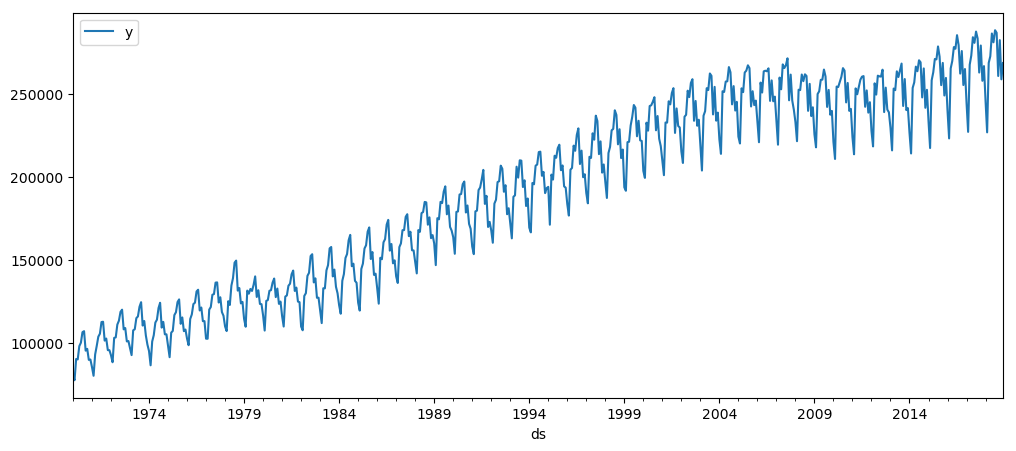

In [8]:
df.plot(x='ds',y='y',figsize=(12,5));

In [9]:
len(df)

588

In [10]:
train = df[:576]
test = df[576:]

In [11]:
train.shape, test.shape

((576, 2), (12, 2))

In [12]:
model = Prophet()
model.fit(train)

03:09:28 - cmdstanpy - INFO - Chain [1] start processing
03:09:29 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future_df = model.make_future_dataframe(periods=12,freq='MS')
future_df.head()

,ds
0,1970-01-01
1,1970-02-01
2,1970-03-01
3,1970-04-01
4,1970-05-01


In [14]:
forecast = model.predict(future_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94271.491440,70013.111794,81309.786713,94271.491440,94271.491440,-18592.009874,-18592.009874,-18592.009874,-18592.009874,-18592.009874,-18592.009874,0.0,0.0,0.0,75679.481566
1,1970-02-01,94581.319896,62067.967934,72880.332149,94581.319896,94581.319896,-27104.937367,-27104.937367,-27104.937367,-27104.937367,-27104.937367,-27104.937367,0.0,0.0,0.0,67476.382529
2,1970-03-01,94861.164953,89234.776660,100449.638434,94861.164953,94861.164953,-31.160435,-31.160435,-31.160435,-31.160435,-31.160435,-31.160435,0.0,0.0,0.0,94830.004518
3,1970-04-01,95170.993409,89610.556114,100844.531264,95170.993409,95170.993409,30.939113,30.939113,30.939113,30.939113,30.939113,30.939113,0.0,0.0,0.0,95201.932522
4,1970-05-01,95470.827398,99636.557369,111060.248468,95470.827398,95470.827398,9618.637856,9618.637856,9618.637856,9618.637856,9618.637856,9618.637856,0.0,0.0,0.0,105089.465254


D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


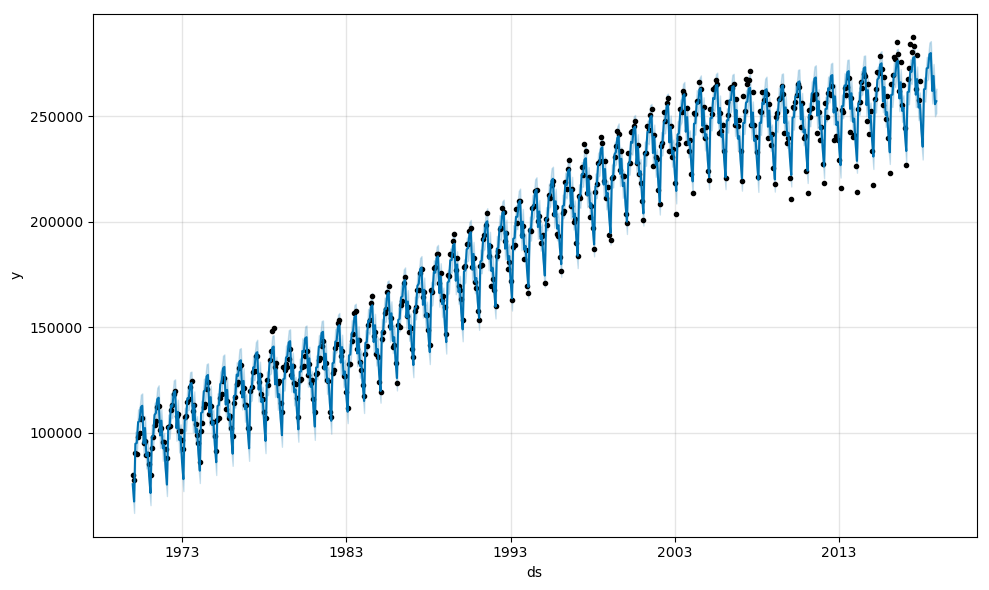

In [15]:
model.plot(forecast);

In [17]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


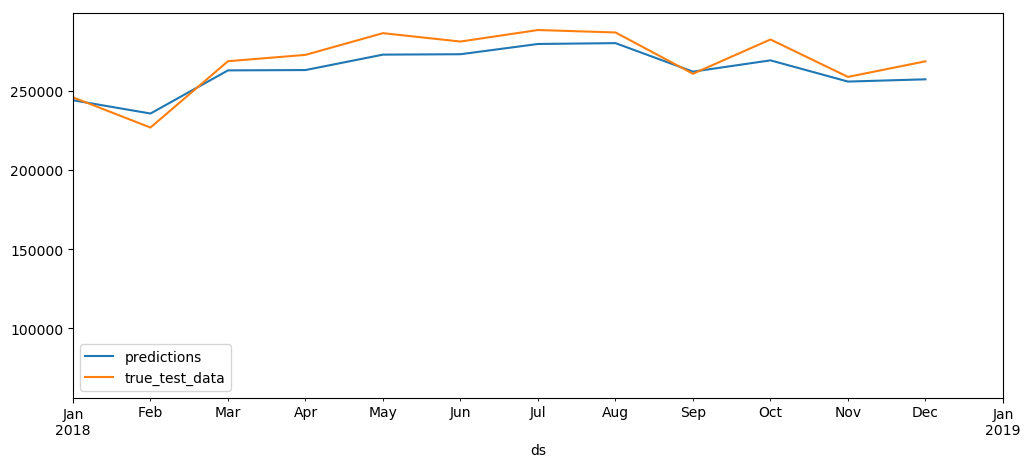

In [18]:
ax = forecast.plot(x='ds',y='yhat',label='predictions',legend=True,figsize=(12,5))
test.plot(x='ds',y='y',label='true_test_data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'));

In [25]:
print("MAE:", meanabs(test.y,forecast['yhat'][-12:]))
print("MSE:", mse(test.y,forecast['yhat'][-12:]))
print("RMSE:", rmse(test.y,forecast['yhat'][-12:]))

MAE: 7652.142875758975
MSE: 74034016.25828396
RMSE: 8604.302194732816


In [26]:
test.y.mean()

268739.6666666667

In [27]:
forecast['yhat'][-12:].mean()

262778.7184962516

In [30]:
# Initial training period
initial = 5 * 365
initial = str(initial) + ' days'
initial

'1825 days'

In [31]:
# Period length of cross validation
period = 5 * 365
period = str(period) + ' days'
period

'1825 days'

In [32]:
# Future Forecast Horizon 
horizon = 365
horizon = str(horizon) + ' days'
horizon

'365 days'

In [34]:
df_cv = cross_validation(model,initial=initial,period=period,horizon=horizon)
df_cv.head()

  0%|          | 0/9 [00:00<?, ?it/s]

03:30:51 - cmdstanpy - INFO - Chain [1] start processing
03:30:52 - cmdstanpy - INFO - Chain [1] done processing
03:30:52 - cmdstanpy - INFO - Chain [1] start processing
03:30:52 - cmdstanpy - INFO - Chain [1] done processing
03:30:53 - cmdstanpy - INFO - Chain [1] start processing
03:30:53 - cmdstanpy - INFO - Chain [1] done processing
03:30:53 - cmdstanpy - INFO - Chain [1] start processing
03:30:54 - cmdstanpy - INFO - Chain [1] done processing
03:30:54 - cmdstanpy - INFO - Chain [1] start processing
03:30:54 - cmdstanpy - INFO - Chain [1] done processing
03:30:54 - cmdstanpy - INFO - Chain [1] start processing
03:30:54 - cmdstanpy - INFO - Chain [1] done processing
03:30:55 - cmdstanpy - INFO - Chain [1] start processing
03:30:55 - cmdstanpy - INFO - Chain [1] done processing
03:30:55 - cmdstanpy - INFO - Chain [1] start processing
03:30:55 - cmdstanpy - INFO - Chain [1] done processing
03:30:56 - cmdstanpy - INFO - Chain [1] start processing
03:30:56 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.045736,107003.817134,109917.953020,102445.0,1976-12-11
1,1977-02-01,102996.069494,101627.830430,104503.910732,102416.0,1976-12-11
2,1977-03-01,118973.276565,117514.069806,120397.268753,119960.0,1976-12-11
3,1977-04-01,120612.885433,119104.087304,122083.313718,121513.0,1976-12-11
4,1977-05-01,127882.985779,126418.689852,129321.675932,128884.0,1976-12-11


In [35]:
len(df_cv)

108

In [36]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.444316e+07,4944.002132,4543.524001,0.027822,0.023395,0.027403,0.3
1,53 days,2.194478e+07,4684.526050,4278.142802,0.025076,0.023395,0.024777,0.3
2,54 days,1.850311e+07,4301.523929,3755.453769,0.020194,0.022195,0.020035,0.4
3,55 days,2.338050e+07,4835.338344,4274.607033,0.023245,0.023395,0.022996,0.3
4,57 days,2.120514e+07,4604.904249,4014.174881,0.021540,0.022195,0.021331,0.4
...,...,...,...,...,...,...,...,...
94,360 days,1.856034e+07,4308.171304,3760.668727,0.019600,0.019726,0.019607,0.5
95,361 days,1.763795e+07,4199.756090,3480.698150,0.018200,0.018869,0.018218,0.5
96,362 days,3.198060e+07,5655.139536,4409.507626,0.022012,0.024765,0.021910,0.4
97,364 days,3.018403e+07,5493.999829,4241.143037,0.021382,0.021611,0.021293,0.5


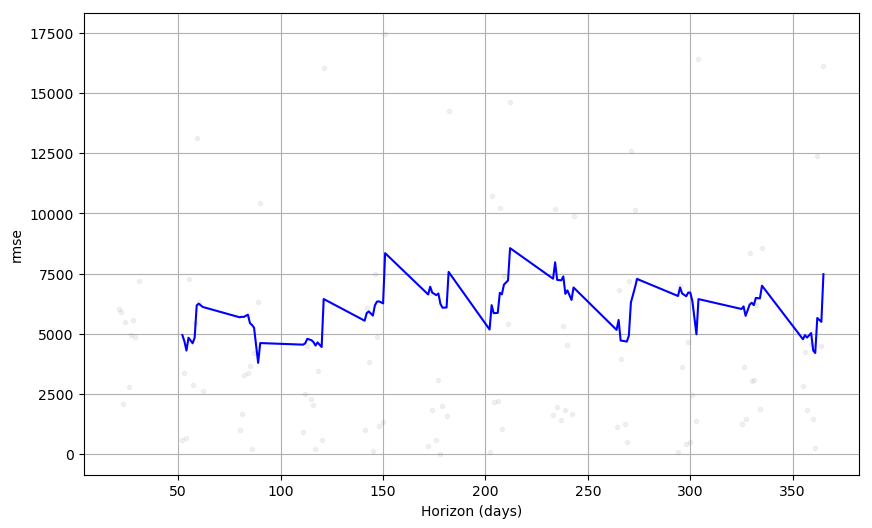

In [40]:
plot_cross_validation_metric(df_cv,metric='rmse');

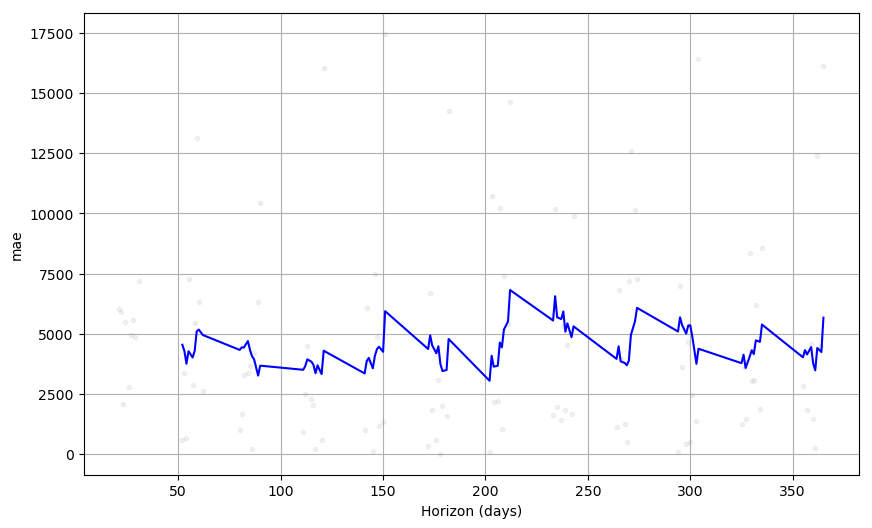

In [41]:
plot_cross_validation_metric(df_cv,metric='mae');

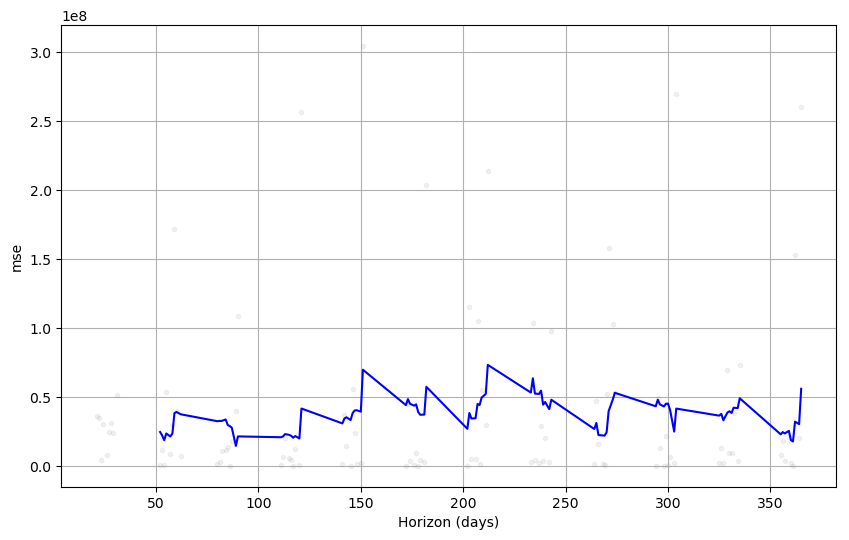

In [42]:
plot_cross_validation_metric(df_cv,metric='mse');

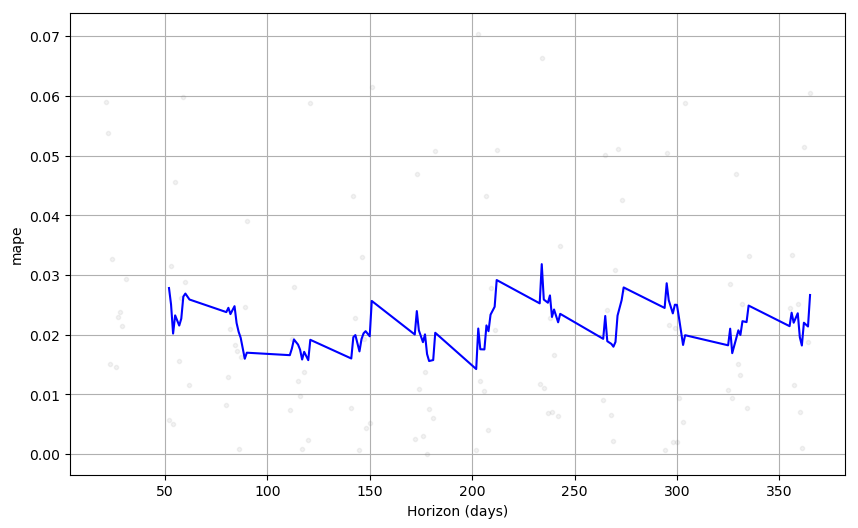

In [43]:
plot_cross_validation_metric(df_cv,metric='mape');

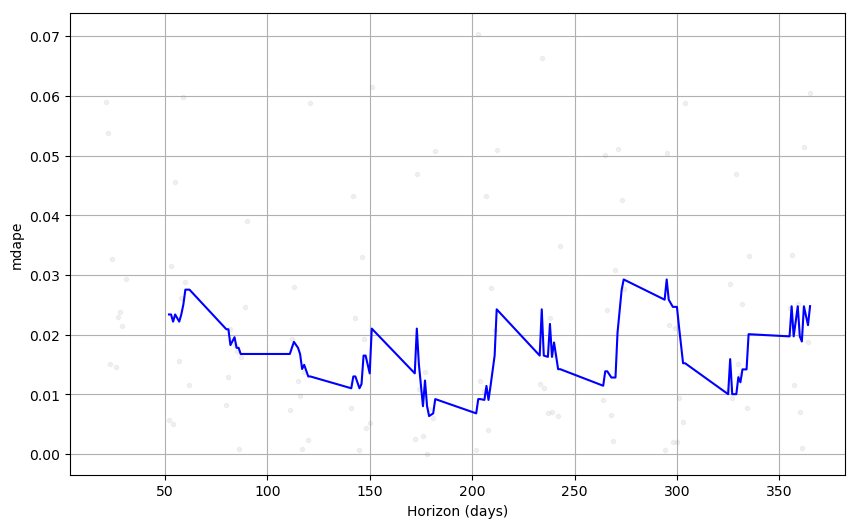

In [44]:
plot_cross_validation_metric(df_cv,metric='mdape');

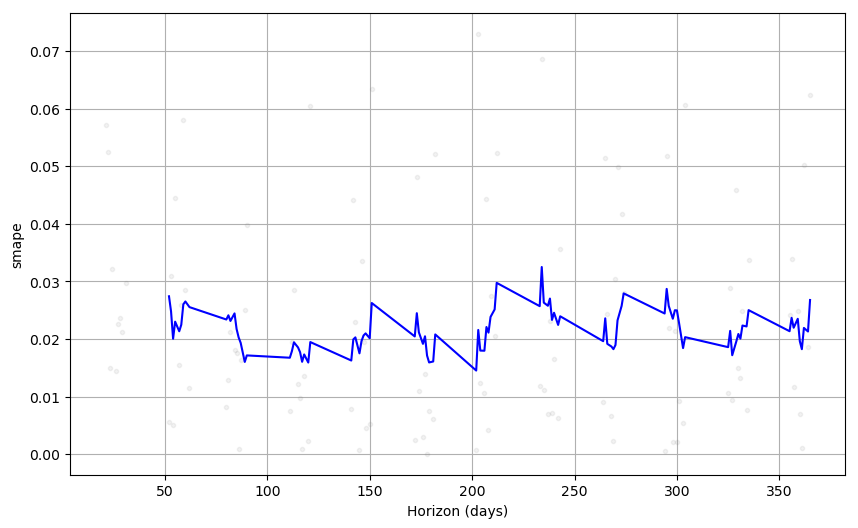

In [45]:
plot_cross_validation_metric(df_cv,metric='smape');